# Explore the data

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## Load the data

In [2]:
raw_data = pd.read_csv('unicef_data.csv', index_col='Country')
raw_data

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",Life expectancy: female 2018,GDP per capita (current US$) 2018,At least basic drinking water services (%) 2017,At least basic sanitation services (%) 2017
Country,,,,,
Afghanistan,62.0,66.0,556.3,67.0,43.0
Albania,9.0,80.0,4532.9,91.0,98.0
Algeria,23.0,78.0,4048.3,94.0,88.0
Andorra,3.0,NaN,39134.4,100.0,100.0
Angola,77.0,64.0,4095.8,56.0,50.0
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),25.0,76.0,16054.5,96.0,94.0
Viet Nam,21.0,79.0,2365.6,95.0,84.0
Yemen,55.0,68.0,963.5,63.0,59.0


# Cluster Analysis

### Import relevant libraries

In [3]:
from sklearn.cluster import KMeans

## GDP per capita & Under-5 Mortality rate

### Selecting the features

In [4]:
x = raw_data.iloc[:,0:3]
x = x.drop('Life expectancy: female 2018', axis=1)
x

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",GDP per capita (current US$) 2018
Country,,
Afghanistan,62.0,556.3
Albania,9.0,4532.9
Algeria,23.0,4048.3
Andorra,3.0,39134.4
Angola,77.0,4095.8
...,...,...
Venezuela (Bolivarian Republic of),25.0,16054.5
Viet Nam,21.0,2365.6
Yemen,55.0,963.5


### Preprocessing

In [5]:
x.isnull().sum()

Under-5 mortality rate (deaths per 1,000 live births) 2018     7
GDP per capita (current US$) 2018                             11
dtype: int64

#### Remove rows with missing values

In [6]:
x_no_mv = x.dropna(axis=0)
x_no_mv.describe(include='all')

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",GDP per capita (current US$) 2018
count,189.000000,189.000000
mean,28.423280,14093.158201
std,28.645498,21458.688225
min,2.000000,283.500000
25%,7.000000,1953.900000
50%,16.000000,5417.600000
75%,45.000000,16054.500000
max,122.000000,166726.100000


### Use Elbow Method to determine optimal number of clusters

In [7]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_no_mv)
    wcss.append(kmeans.inertia_)

wcss

[86569510730.13736,
 27613094075.13405,
 13629385493.523005,
 7785005278.535471,
 4223914973.528387,
 3047855746.52192,
 1980613856.667017,
 1373933427.1640203,
 809789256.508098]

Text(0, 0.5, 'WCSS')

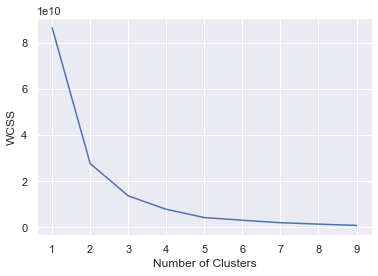

In [8]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

It appears that the optimal number of clusters may be 2 or 3 according to the elbow method

### Clustering

#### 2 clusters

In [9]:
kmeans = KMeans(2)
results = kmeans.fit_predict(x_no_mv)
results

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
x_w_clusters = x_no_mv.copy()
x_w_clusters['cluster'] = results
x_w_clusters

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",GDP per capita (current US$) 2018,cluster
Country,,,
Afghanistan,62.0,556.3,0
Albania,9.0,4532.9,0
Algeria,23.0,4048.3,0
Andorra,3.0,39134.4,1
Angola,77.0,4095.8,0
...,...,...,...
Venezuela (Bolivarian Republic of),25.0,16054.5,0
Viet Nam,21.0,2365.6,0
Yemen,55.0,963.5,0


Text(0.5, 0, 'GDP per capita (current US$) 2018')

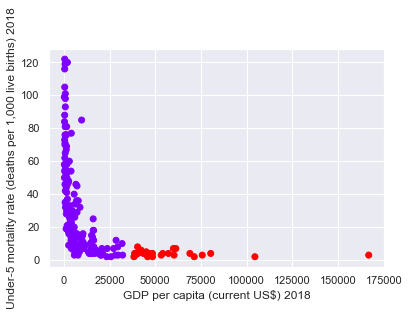

In [11]:
plt.scatter(x_w_clusters['GDP per capita (current US$) 2018'],x_w_clusters['Under-5 mortality rate (deaths per 1,000 live births) 2018'],c=x_w_clusters['cluster'],cmap='rainbow')
plt.ylabel('Under-5 mortality rate (deaths per 1,000 live births) 2018')
plt.xlabel('GDP per capita (current US$) 2018')

##### Analysis of plot and clusters

There doesn't seem to be much predictive value in the clusters. The two clusters are seperated by GDP because the scale of the GDP is so much greater than the Under-5 mortality rate. The data needs to be standardized and outliers need to be removed before the cluster analysis

#### remove outliers, standardize, recluster, and replot

In [12]:
q = x_no_mv['GDP per capita (current US$) 2018'].quantile(0.99)
x_no_mv = x_no_mv[x_no_mv['GDP per capita (current US$) 2018']<q]

In [13]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x_no_mv)
x_scaled

array([[ 1.16451222, -0.71495298],
       [-0.6889454 , -0.48262165],
       [-0.19935282, -0.51093422],
       [-0.8987708 ,  1.53895776],
       [ 1.68907571, -0.50815905],
       [-0.7938581 ,  0.17709745],
       [-0.65397451,  0.10507158],
       [-0.58403271, -0.51875143],
       [-0.8637999 ,  2.4129433 ],
       [-0.8637999 ,  2.02075052],
       [-0.23432372, -0.50516186],
       [-0.65397451,  1.11383103],
       [-0.7588872 ,  0.63811442],
       [ 0.04544347, -0.65607849],
       [-0.58403271,  0.20647919],
       [-0.8987708 , -0.41082948],
       [-0.8637999 ,  1.79443693],
       [-0.54906181, -0.45785545],
       [ 2.24861008, -0.69911407],
       [ 0.04544347, -0.54935424],
       [-0.05946923, -0.55166786],
       [-0.7938581 , -0.43227715],
       [ 0.25526886, -0.28626819],
       [-0.51409091, -0.17016679],
       [-0.58403271,  0.92185942],
       [-0.7588872 , -0.26673684],
       [ 1.65410481, -0.70994599],
       [ 1.02462863, -0.73033618],
       [-0.33923642,

In [14]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x_no_mv.copy()
clusters_new['cluster'] = kmeans_new.fit_predict(x_scaled)

Text(0.5, 0, 'GDP per capita (current US$) 2018')

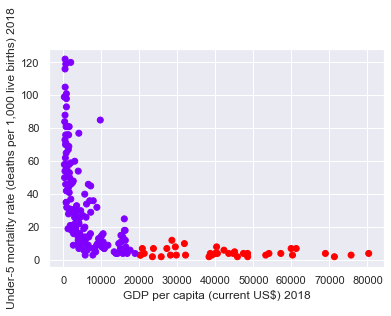

In [15]:
plt.scatter(x_no_mv['GDP per capita (current US$) 2018'],x_no_mv['Under-5 mortality rate (deaths per 1,000 live births) 2018'],c=clusters_new['cluster'],cmap='rainbow')
plt.ylabel('Under-5 mortality rate (deaths per 1,000 live births) 2018')
plt.xlabel('GDP per capita (current US$) 2018')

Note that the graph is of the unscaled data, however the clusters were determined using scaled data

##### Analysis of plot and clusters

Now that the outliers of GDP have been removed and the data was standardized before it was clustered, the cluster analysis is more revealing. The graph still seems to follow a f(x)=1/x pattern. This means that as GDP increases, Under-5 mortality rate drastically decreases. The clusters however are still not very descriptive of the data. They could be labelled as "Countries with low GDP's per capita" and "Countries with high GDP's per capita"

#### 3 clusters

Since it is obvious from the two cluster solution that outliers in GDP need to be removed and the data needs to be standardized before it is clustered, we will use that previous work in this section

In [16]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x_no_mv.copy()
clusters_new['cluster'] = kmeans_new.fit_predict(x_scaled)

Text(0.5, 0, 'GDP per capita (current US$) 2018')

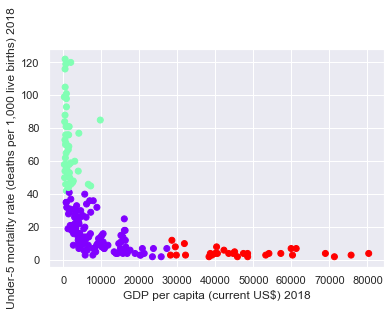

In [17]:
plt.scatter(x_no_mv['GDP per capita (current US$) 2018'],x_no_mv['Under-5 mortality rate (deaths per 1,000 live births) 2018'],c=clusters_new['cluster'],cmap='rainbow')
plt.ylabel('Under-5 mortality rate (deaths per 1,000 live births) 2018')
plt.xlabel('GDP per capita (current US$) 2018')

##### Analysis of plot and clusters

This cluster analysis is better for describing the real relationship between the data. The three clusters could now be labelled as "Countries with low GDP per capita and high Under-5 mortality rates", "Countries with low-medium GDP per capita and low Under-5 mortality rates", and "Countries with high GDP per capita and low Under-5 mortality rates". These groupings fit much better with the assertion that as GDP per capita increases, under-5 mortality rates drastically decrease 